In [1]:
import logging
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA 
import matplotlib.pyplot as plt 
import seaborn as sns
from arima import OptimizedArima

logging.basicConfig(level=logging.INFO)
sns.set_theme(style='darkgrid')

df_ufi = pd.read_csv('../input/us_financial_indices_2021.csv').assign(
    DATE=lambda d: pd.to_datetime(d.DATE)
).set_index('DATE')
df_ufi

,DJIA,SP500,NASDAQ100
DATE,,,
2021-01-04,30223.89,3700.65,12694.66
2021-01-05,30391.60,3726.86,12802.38
2021-01-06,30829.40,3748.14,12623.35
2021-01-07,31041.13,3803.79,12939.57
2021-01-08,31097.97,3824.68,13105.20
...,...,...,...
2021-12-27,36302.38,4791.19,16567.50
2021-12-28,36398.21,4786.35,16488.66
2021-12-29,36488.63,4793.06,16491.01


In [2]:
oa = OptimizedArima(y=df_ufi.SP500, p_range=(0, 2), d_range=(0, 2), q_range=(0, 2))
res = oa.fit_parameters()

INFO:arima:self.test_size: 126
INFO:arima:self.arima_order_ranges: (slice(0, 3, 1), slice(0, 3, 1), slice(0, 3, 1))
INFO:arima:self.arima_order: (0, 2, 1)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
INFO:arima:res.summary():                                SARIMAX Results                       

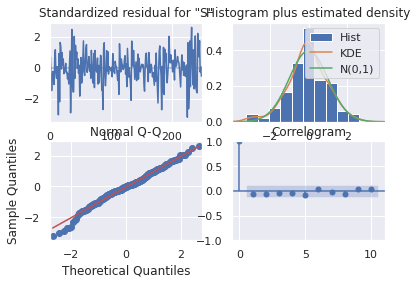

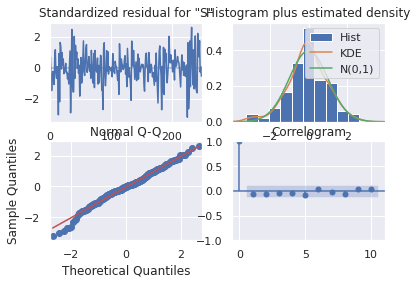

In [3]:
res.plot_diagnostics()

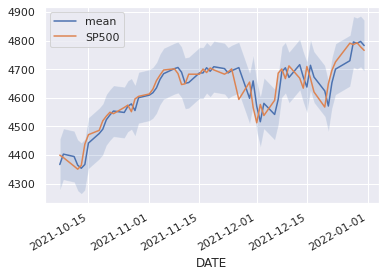

In [4]:
df_plt = res.get_prediction().summary_frame(alpha=0.01).join(df_ufi[['SP500']]).tail(60)
df_plt[['mean', 'SP500']].plot.line()
plt.fill_between(df_plt.index, df_plt.mean_ci_lower, df_plt.mean_ci_upper, alpha=0.2)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


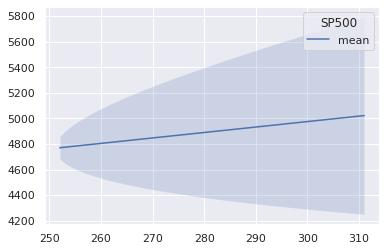

In [5]:
df_f = res.get_forecast(steps=60).summary_frame(alpha=0.01)
df_f[['mean']].plot.line()
plt.fill_between(df_f.index, df_f.mean_ci_lower, df_f.mean_ci_upper, alpha=0.2)

In [6]:
lr_sp500 = np.log(df_ufi.SP500).diff().iloc[1:].ewm(span=6).mean()
oa = OptimizedArima(y=lr_sp500, p_range=(0, 2), d_range=(0, 2), q_range=(0, 2))
res = oa.fit_parameters()

INFO:arima:self.test_size: 125
INFO:arima:self.arima_order_ranges: (slice(0, 3, 1), slice(0, 3, 1), slice(0, 3, 1))
INFO:arima:self.arima_order: (1, 0, 0)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
INFO:arima:res.summary():                                SARIMAX Results                       

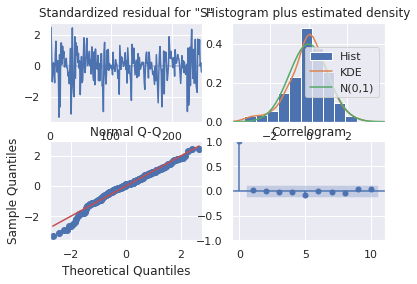

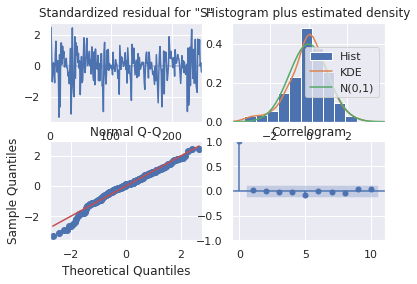

In [7]:
res.plot_diagnostics()

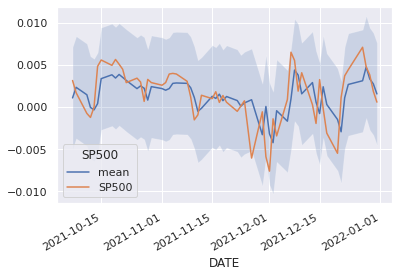

In [8]:
df_plt = res.get_prediction().summary_frame(alpha=0.01).assign(SP500=lr_sp500).tail(60)
df_plt[['mean', 'SP500']].plot.line()
plt.fill_between(df_plt.index, df_plt.mean_ci_lower, df_plt.mean_ci_upper, alpha=0.2)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


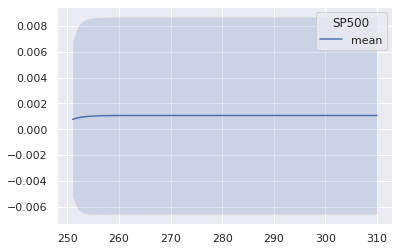

In [9]:
df_f = res.get_forecast(steps=60).summary_frame(alpha=0.01)
df_f[['mean']].plot.line()
plt.fill_between(df_f.index, df_f.mean_ci_lower, df_f.mean_ci_upper, alpha=0.2)